In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
ds = pd.read_csv('../Dissertation_projects/Experiments/STEPWISE_EXPS/STEPWISE_CDOM_FE_DATA.csv', sep=',', index_col=0)


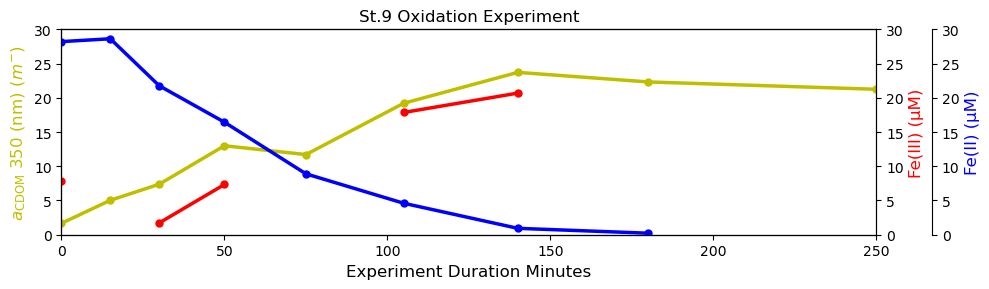

In [3]:
df = ds[ds['group'] == 'one']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y',  marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-})$', fontsize=12, color = 'y')
ax1.set_ylim(0, 30)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 30)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 30)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 250)

# Title and legend
plt.title('St.9 Oxidation Experiment')
fig.tight_layout()  # Adjust layout for better spacing

plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.9.png')

plt.show()

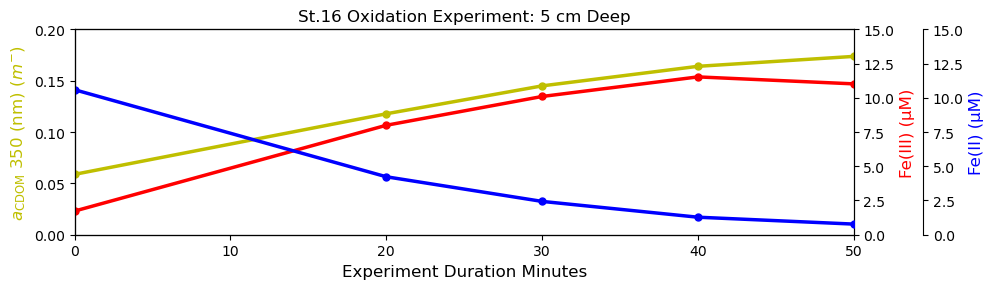

In [4]:
df = ds[ds['group'] == 'seven']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y',  marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-})$', fontsize=12, color = 'y')
ax1.set_ylim(0, .2)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 15)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 15)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 50)

# Title and legend
plt.title('St.16 Oxidation Experiment: 5 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.15_cm5.png')

plt.show()

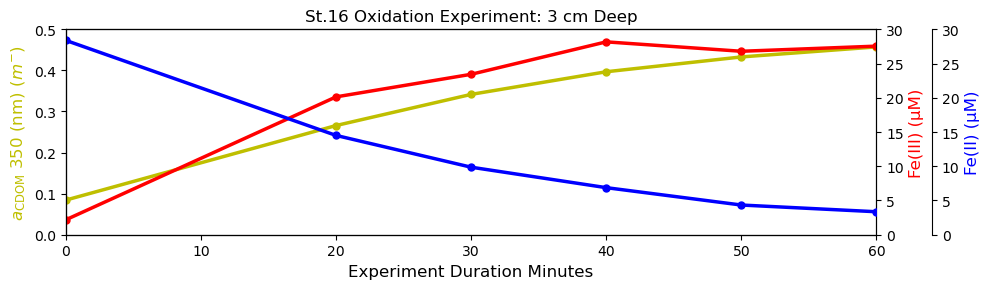

In [5]:
df = ds[ds['group'] == 'eight']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y', marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-})$', fontsize=12, color = 'y')
ax1.set_ylim(0, .5)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 30)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 30)

ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 60)

# Title and legend
plt.title('St.16 Oxidation Experiment: 3 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.15_cm3.png')

plt.show()

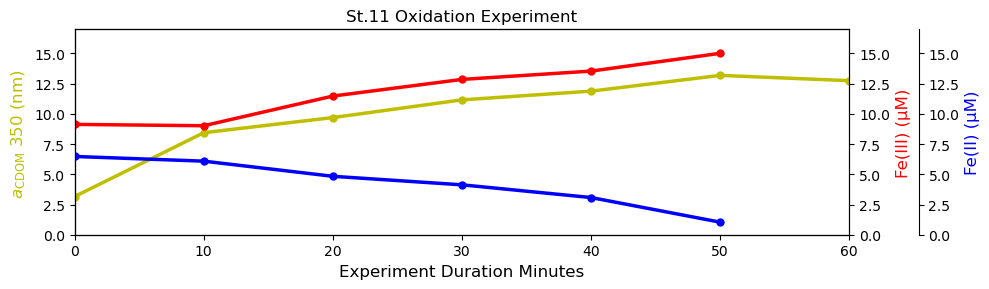

In [6]:
df = ds[ds['group'] == 'nine']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y',  marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) ', fontsize=12, color = 'y')
ax1.set_ylim(0,17)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 17)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 17)

ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 60)

# Title and legend
plt.title('St.11 Oxidation Experiment')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.11.png')

plt.show()

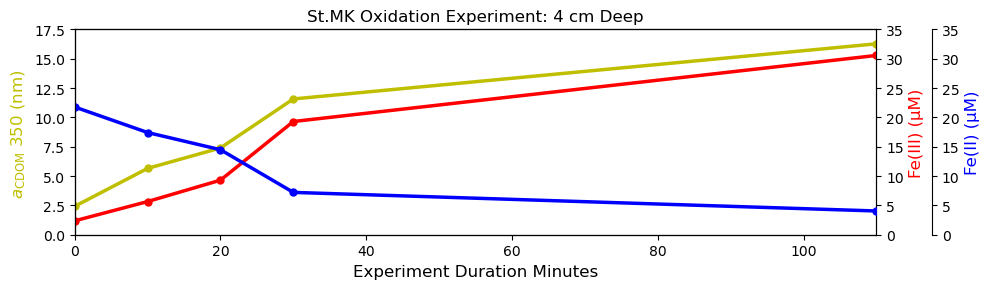

In [7]:
df = ds[ds['group'] == 'ten']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y',  marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) ', fontsize=12, color = 'y')
ax1.set_ylim(0,17.5)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 35)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 35)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 110)

# Title and legend
plt.title('St.MK Oxidation Experiment: 4 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.MK_cm4.png')

plt.show()

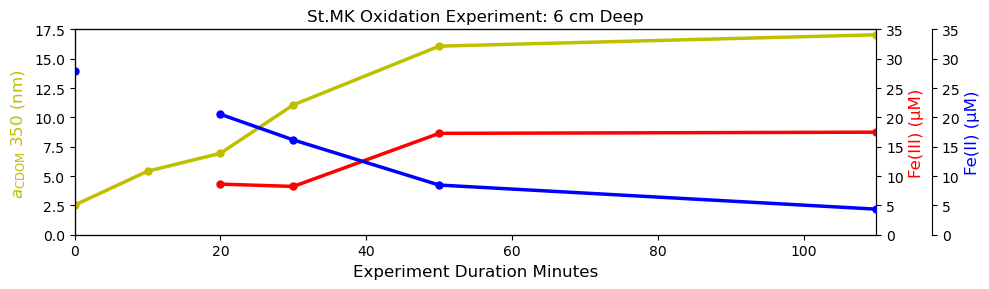

In [8]:
df = ds[ds['group'] == 'eleven']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y',  marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) ', fontsize=12, color = 'y')
ax1.set_ylim(0,17.5)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r',  marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 35)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b',  marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 35)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 110)

# Title and legend
plt.title('St.MK Oxidation Experiment: 6 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.MK_cm6.png')

plt.show()

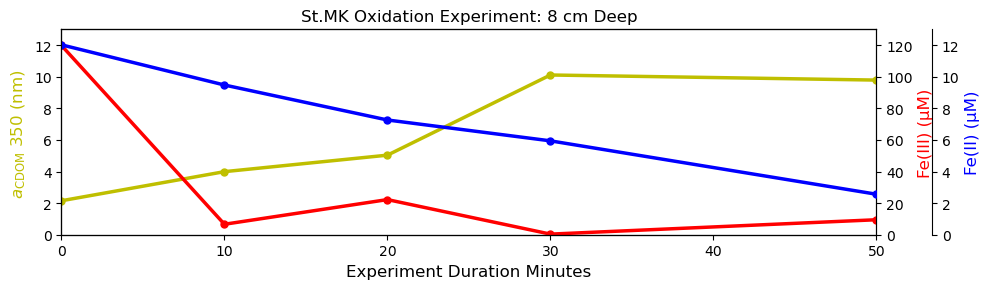

In [9]:
df = ds[ds['group'] == 'twelvel']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y', marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) ', fontsize=12, color = 'y')
ax1.set_ylim(0,13)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r', marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 130)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b', marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 13)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 50)

# Title and legend
plt.title('St.MK Oxidation Experiment: 8 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.MK_cm8.png')

plt.show()

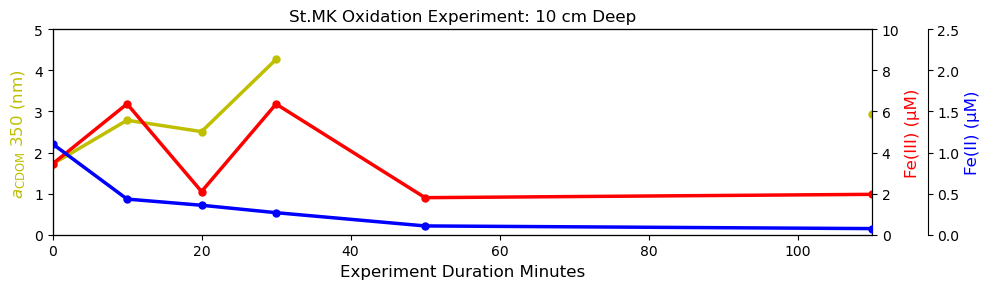

In [10]:
df = ds[ds['group'] == 'therteen']

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 3))

# Plot Discharge on the primary y-axis
ax1.plot(df['Time'], df['a350'], color='y', marker = 'o', markersize=5, linewidth=2.5)
ax1.set_ylabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) ', fontsize=12, color = 'y')
ax1.set_ylim(0,5)
ax1.set_xlabel('Experiment Duration Minutes', fontsize=12)


# Create secondary y-axis for Organic Carbon
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Fe3_uM'], color='r', marker = 'o', markersize=5, linewidth=2.5)
ax2.set_ylabel('Fe(III) (\u03BCM)', fontsize=12, color = 'r')
ax2.set_ylim(0, 10)


# Create third y-axis for Suspended Sediment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 40))  # Move the axis to the right
ax3.plot(df['Time'], df['Fe2_uM'], color='b', marker = 'o', markersize=5, linewidth=2.5)
ax3.set_ylim(0, 2.5)
ax3.set_ylabel('Fe(II) (\u03BCM)', fontsize=12, color = 'b')

# Set x-axis limits
plt.xlim(0, 110)

# Title and legend
plt.title('St.MK Oxidation Experiment: 10 cm Deep')
fig.tight_layout()  # Adjust layout for better spacing
plt.savefig(f'../Dissertation_projects/Experiments/Figs_GOM/CDOM_FE_St.MK_cm10.png')

plt.show()